In [33]:
## Import Essential Data handling libraries
import pandas as pd
import numpy as np

from math import floor
from time import perf_counter
import time

import matplotlib.pyplot as plt,seaborn as sns
import matplotlib as mpl
%matplotlib inline


from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE

In [34]:
### Importing Machine Learning Libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score,classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# from xgboost import XGBClassifier

# import lightgbm as lgb

# from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFECV

In [35]:
# from functools import partial
# from skopt import space
# from skopt import gp_minimize

# from hyperopt import hp, fmin, tpe, Trials
# from hyperopt.pyll.base import scope


# import optuna

#### Loading Data

In [36]:
df_raw = pd.read_csv("..\data\creditcard.csv")

In [37]:
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [38]:
df_raw.drop(["Time"], axis = 1, inplace  = True)

##### Checking Class Distribution

In [39]:
print(df_raw.Class.value_counts())

print("\n","% distribution\n",df_raw.Class.value_counts(True)*100)

0    284315
1       492
Name: Class, dtype: int64

 % distribution
 0   99.827
1    0.173
Name: Class, dtype: float64


In [40]:
df_raw.shape

(284807, 30)

#### Data Transformation
* 1. Quantile Transformation (normal distribution)
* 2. Min-Max [0,1] scaling the data

In [41]:
quantile_transformer = QuantileTransformer(output_distribution="normal")
# standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [42]:
df_transformed = df_raw.copy()

for i in range(df_transformed.iloc[:,:-1].shape[1]):
    qt_transformed_var = quantile_transformer.fit_transform(df_transformed.iloc[:,i].values.reshape(-1,1))[:,0]
#     qt_transformed_std_scaled = standard_scaler.fit_transform(qt_transformed_var.reshape(-1,1))[:,0]
    qt_transformed_std_scaled = min_max_scaler.fit_transform(qt_transformed_var.reshape(-1,1))[:,0]
    
    df_transformed.iloc[:,i] = qt_transformed_std_scaled

In [43]:
df_transformed.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.404,0.485,0.704,0.614,0.471,0.569,0.528,0.519,0.542,0.529,0.455,0.415,0.404,0.450,0.671,0.435,0.538,0.504,0.558,0.593,0.503,0.534,0.456,0.507,0.519,0.470,0.580,0.469,0.604,0
1,0.544,0.521,0.499,0.540,0.512,0.521,0.484,0.516,0.476,0.489,0.658,0.631,0.549,0.472,0.564,0.556,0.493,0.476,0.478,0.497,0.436,0.419,0.547,0.437,0.526,0.537,0.490,0.506,0.414,0
2,0.405,0.379,0.633,0.533,0.454,0.632,0.592,0.551,0.360,0.543,0.554,0.490,0.570,0.469,0.766,0.244,0.643,0.484,0.260,0.632,0.585,0.600,0.695,0.392,0.433,0.481,0.449,0.426,0.660,0
3,0.432,0.473,0.635,0.434,0.505,0.614,0.528,0.572,0.369,0.506,0.483,0.504,0.551,0.453,0.431,0.376,0.399,0.712,0.354,0.437,0.475,0.500,0.424,0.339,0.634,0.462,0.550,0.556,0.593,0
4,0.418,0.572,0.612,0.535,0.464,0.539,0.568,0.418,0.583,0.591,0.429,0.553,0.633,0.366,0.514,0.437,0.475,0.496,0.607,0.619,0.506,0.604,0.445,0.521,0.461,0.598,0.603,0.640,0.559,0


In [44]:
#selected vars (manual feature selection, on the basis of density separation wrt the target class)
all_vars = list(set(list(df_transformed.columns)) - set(["V8","V13","V15", "V19", "V20", "V22", "V23","V24", "V25", "V26", "Amount"]))
 
df = df_transformed[all_vars]

In [45]:
df.head()

,V28,V17,Class,V6,V27,V14,V7,V18,V3,V5,V11,V1,V12,V9,V4,V2,V16,V10,V21
0,0.469,0.538,0,0.569,0.580,0.450,0.528,0.504,0.704,0.471,0.455,0.404,0.415,0.542,0.614,0.485,0.435,0.529,0.503
1,0.506,0.493,0,0.521,0.490,0.472,0.484,0.476,0.499,0.512,0.658,0.544,0.631,0.476,0.540,0.521,0.556,0.489,0.436
2,0.426,0.643,0,0.632,0.449,0.469,0.592,0.484,0.633,0.454,0.554,0.405,0.490,0.360,0.533,0.379,0.244,0.543,0.585
3,0.556,0.399,0,0.614,0.550,0.453,0.528,0.712,0.635,0.505,0.483,0.432,0.504,0.369,0.434,0.473,0.376,0.506,0.475
4,0.640,0.475,0,0.539,0.603,0.366,0.568,0.496,0.612,0.464,0.429,0.418,0.553,0.583,0.535,0.572,0.437,0.591,0.506


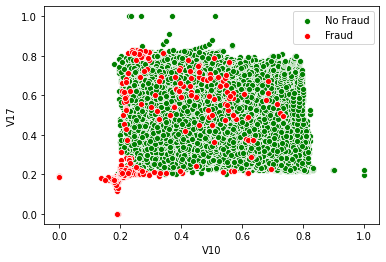

In [46]:
sns.scatterplot(df[df.Class==0]["V10"],df[df.Class==0]["V17"],
                color="g", label = "No Fraud")
sns.scatterplot(df[df.Class==1]["V10"],df[df.Class==1]["V17"],
                color="r", label = "Fraud")

In [47]:
features = features = [f for f in df.columns if f not in ["Class"]]
print(features)

['V28', 'V17', 'V6', 'V27', 'V14', 'V7', 'V18', 'V3', 'V5', 'V11', 'V1', 'V12', 'V9', 'V4', 'V2', 'V16', 'V10', 'V21']


In [48]:
def create_stratified_folds(data, k_fold_num, target_variable):
    data["kfold"] = -1 # we create a new column called kfold and fill it with -1
    data = data.sample(frac=1).reset_index(drop=True) # the next step is to randomize the rows of the data

    y = data[target_variable].values

    kf = model_selection.StratifiedKFold(n_splits= k_fold_num)

    for fold, (trn_, partitioned_idx_) in enumerate(kf.split(X=data, y = y)):
        data.loc[partitioned_idx_, 'kfold'] = fold
    return(data)

In [49]:
# Creating stratified k-fold within the data
k_fold_num = 5

df = create_stratified_folds(df, k_fold_num = 5, target_variable = "Class")

In [52]:
df = df[df.kfold!=5]

In [53]:
X = df[features].values
Y = df["Class"].values

X_df = pd.DataFrame(X, columns=features)

In [54]:
X_df["Class"] = Y

In [55]:
np.sum(Y)

492

In [56]:
X_df.head()

,V28,V17,V6,V27,V14,V7,V18,V3,V5,V11,V1,V12,V9,V4,V2,V16,V10,V21,Class
0,0.481,0.580,0.619,0.533,0.568,0.455,0.288,0.518,0.546,0.737,0.524,0.702,0.475,0.524,0.493,0.403,0.499,0.483,0
1,0.277,0.257,0.321,0.714,0.310,0.704,0.449,0.301,0.551,0.650,0.283,0.554,0.779,0.294,0.763,0.350,0.795,0.307,0
2,0.381,0.503,0.253,0.512,0.575,0.534,0.464,0.516,0.552,0.460,0.379,0.635,0.622,0.276,0.417,0.386,0.244,0.601,0
3,0.465,0.597,0.517,0.528,0.382,0.353,0.308,0.488,0.367,0.432,0.643,0.479,0.568,0.462,0.388,0.587,0.569,0.508,0
4,0.480,0.618,0.587,0.552,0.536,0.338,0.659,0.507,0.373,0.442,0.591,0.355,0.691,0.521,0.379,0.315,0.508,0.341,0


### PyOD detectors

In [57]:
np.mean(Y)

0.001727485630620034

In [58]:
outlier_fraction = 0.0017

In [59]:
from pyod.models.cblof import CBLOF
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest

In [60]:
detector_models = []
detector_models.append(('LOF', CBLOF(contamination=outlier_fraction, check_estimator=False)))
detector_models.append(('IForest', IForest(contamination=outlier_fraction)))
detector_models.append(('HBOS', HBOS(contamination=outlier_fraction)))
# detector_models.append(('KNN', KNN(contamination=outlier_fraction, n_neighbors=20)))



1. Initializing fraud detection model : LOF.....
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.44      0.43      0.43       492

    accuracy                           1.00    284807
   macro avg       0.72      0.71      0.72    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix : 
         0    1
0  284041  274
1     281  211


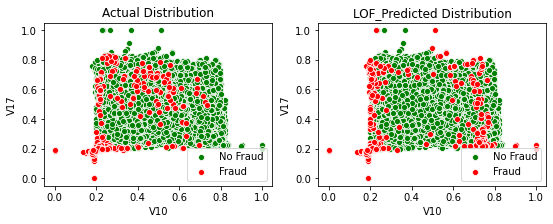



2. Initializing fraud detection model : IForest.....
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.39      0.39      0.39       492

    accuracy                           1.00    284807
   macro avg       0.70      0.69      0.69    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix : 
         0    1
0  284021  294
1     301  191


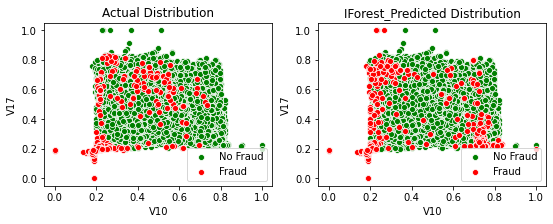



3. Initializing fraud detection model : HBOS.....
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.45      0.44      0.44       492

    accuracy                           1.00    284807
   macro avg       0.72      0.72      0.72    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix : 
         0    1
0  284046  269
1     276  216


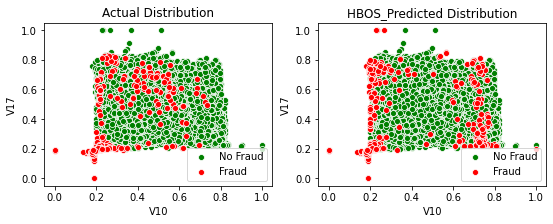

In [61]:
plt.rcParams["figure.figsize"] = [9, 3]
Precision_results = {}
Recall_results = {}
F1_score_results = {}
time_taken = {}
i = 1

for name, outlier_model in detector_models:
    print(f"\n\n{i}. Initializing fraud detection model : {name}.....")
    t0 = perf_counter()
    
    outlier_model.fit(X)
    
    y_pred = outlier_model.predict(X)    
    X_df[name] = y_pred
    
    print("Classification Report : \n", classification_report(X_df["Class"], y_pred))
    
    cf_matrix = confusion_matrix(X_df["Class"], y_pred)
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
    print("Confusion Matrix : \n", df_cm)
          
    
    f1 = f1_score(X_df["Class"], y_pred)    
    p = precision_score(X_df["Class"], y_pred)
    r = recall_score(X_df["Class"], y_pred)
    
    Precision_results[name] = p
    Recall_results[name] = r
    F1_score_results[name] = f1
    
    t1 = perf_counter()
    time_taken[name] = np.round((t1 - t0)/60,2)
    
    
    fig, axs = plt.subplots(ncols = 2, nrows = 1)
    
    axs[0].set_title("Actual Distribution")
    sns.scatterplot(X_df[X_df.Class==0]["V10"],X_df[X_df.Class==0]["V17"],
                    color="g", label = "No Fraud", ax = axs[0])
    sns.scatterplot(X_df[X_df.Class==1]["V10"],X_df[X_df.Class==1]["V17"],
                    color="r", label = "Fraud", ax = axs[0])

    axs[1].set_title(f"{name}_Predicted Distribution")
    sns.scatterplot(X_df[X_df[name]==0]["V10"],X_df[X_df[name]==0]["V17"],
                    color="g", label = "No Fraud", ax = axs[1])
    sns.scatterplot(X_df[X_df[name]==1]["V10"],X_df[X_df[name]==1]["V17"],
                    color="r", label = "Fraud", ax = axs[1])
    
    plt.show()
    time.sleep(10)
    i = i+1

mpl.rcParams.update(mpl.rcParamsDefault)

In [62]:
F1_score_results

{'LOF': 0.43193449334698053,
 'IForest': 0.390992835209826,
 'HBOS': 0.44216990788126925}

In [63]:
Precision_results

{'LOF': 0.4350515463917526,
 'IForest': 0.3938144329896907,
 'HBOS': 0.44536082474226807}

In [64]:
Recall_results

{'LOF': 0.42886178861788615,
 'IForest': 0.3882113821138211,
 'HBOS': 0.43902439024390244}

In [69]:
algo = ["LOF", "IForest", "HBOS"]

for alg in algo:
    print(alg)
    print("Precision : ", np.round(Precision_results[alg],5))
    print("Recall : ", np.round(Recall_results[alg],5))
    print("F1 : ", np.round(F1_score_results[alg],5))
    print("\n")


LOF
Precision :  0.43505
Recall :  0.42886
F1 :  0.43193


IForest
Precision :  0.39381
Recall :  0.38821
F1 :  0.39099


HBOS
Precision :  0.44536
Recall :  0.43902
F1 :  0.44217


